In [5]:
# Assignment - 1
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import math
import copy
# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

Question - 1

In [31]:
# Specify the file path
directory_path = 'C:\\Abhishek\\IIITD\\Academics\\CSE\\CSE558_DSc\\Assignment1\\auto+mpg\\auto-mpg.data'
directory_path2 = 'C:\\Abhishek\\IIITD\\Academics\\CSE\\CSE558_DSc\\Assignment1'
df = pd.read_csv(directory_path, delimiter='\t')

First we clean up the data by dropping the index column and then splitting up the columns correctly

Add an Index column manually so it is easier to drop it

Deleting all 6 rows with incomplete data

In [32]:
#new column names
new_col_names = ['merged_cols','car_name']
df.columns = new_col_names
df[['mpg','cylinders','displacement','horsepower','weight','acceleration','model_year','origin']] = df['merged_cols'].str.split(expand=True)
df.to_csv('C:\\Abhishek\\IIITD\\Academics\\CSE\\CSE558_DSc\\Assignment1\\testautompg.csv')

#MANUALLY ADD THE WORD INDEX IN THE CSV, IT DOES NOT RECOGNIZE IT AS A COLUMN

In [ ]:
# manually added the first column header to be able to drop the index and the merged columns
df = pd.read_csv('C:\\Abhishek\\IIITD\\Academics\\CSE\\CSE558_DSc\\Assignment1\\testautompg.csv')
print(df.columns)
df = df.drop(columns=['Index','merged_cols','car_name'])
print(df.columns)

In [ ]:
empty_rows = []

for i, value in enumerate(df['horsepower']):
    if value == '?': 
        empty_rows.append(i)

df = df.drop(empty_rows)
print(empty_rows)

a) For discrete attributes, apply a one-hot encoding and for non numeric ordinal attributes, apply integer mapping

In [ ]:
# convert all to integer/float except car name which will be dropped
int_cols = ['model_year', 'origin', 'cylinders']
float_cols = ['mpg', 'displacement', 'horsepower', 'weight', 'acceleration']
df[int_cols] = df[int_cols].astype(int)
df[float_cols] = df[float_cols].astype(float)
# df = df.drop('car_name')
df.to_csv('C:\\Abhishek\\IIITD\\Academics\\CSE\\CSE558_DSc\\Assignment1\\finalautompg.csv')

In [ ]:
df = pd.read_csv('C:\\Abhishek\\IIITD\\Academics\\CSE\\CSE558_DSc\\Assignment1\\finalautompg.csv')
df_copy = df.copy()
print(df.shape)
df = pd.get_dummies(df,columns=int_cols)
print(df.columns)
df = df.drop(columns=['Index'])
print(df.columns)
print(df.shape)
print(df_copy.shape)

b) Find mean and variance of continious data features i.e float_cols

In [186]:
def norm(arr):
    nrm = 0
    for i in arr:
        nrm += i**2
    return nrm

var = 0
mean_vec = np.array([0.0]*26)
df_np = df.values

for i in df_np:
    mean_vec += i/df_np.shape[0] #mean vector found

# mean_vec = df_np.mean()
for i in df_np:
    var += norm(i-mean_vec)/df_np.shape[0] #variance found

print('Mean Vector is : ', mean_vec)
print('Variance is : ',var)


Mean Vector is :  [2.34598465e+01 1.94124041e+02 1.04404092e+02 2.97623785e+03
 1.55503836e+01 7.16112532e-02 6.90537084e-02 7.16112532e-02
 1.02301790e-01 6.64961637e-02 7.67263427e-02 8.69565217e-02
 7.16112532e-02 9.20716113e-02 7.41687980e-02 6.90537084e-02
 7.16112532e-02 7.67263427e-02 6.24040921e-01 1.73913043e-01
 2.02046036e-01 1.02301790e-02 5.08951407e-01 7.67263427e-03
 2.12276215e-01 2.60869565e-01]
Variance is :  733242.4392884662


In [188]:
df_norm = df_np.copy()

newvar = 0
newmean = np.array([0.0]*26)
for i in df_norm:
    newvar += norm((i-mean_vec)/math.sqrt(var))/df_norm.shape[0] #variance found
    newmean += i-mean_vec

print('Mean Vector is : ',newmean)
print('Variance is : ',newvar)


Mean Vector is :  [ 3.63797881e-12  1.41540113e-10 -1.17509558e-10  9.46329237e-10
  2.68052247e-12  3.08364445e-14 -1.06137321e-13  2.72837308e-14
 -1.86489713e-13  1.02168274e-13 -8.80684414e-14 -1.08330012e-13
  2.72837308e-14  8.56814619e-14  4.38538095e-14 -6.17284002e-14
  2.68396416e-14 -1.73860926e-13  1.33226763e-14  4.81281681e-14
  1.53932422e-13  1.63410951e-15  5.29687405e-13 -4.03149736e-15
  1.57929225e-13  2.37587727e-13]
Variance is :  1.0000000000000013


_+_+_+_+_+_+_+_+_+__+_+_+_+_+_+_+_+_+__+_+_+_+_+_+_+_+_+__END OF QUESTION - 1_+_+_+_+_+_+_+_+_+__+_+_+_+_+_+_+_+_+__+_+_+_+_+_+_+_+_+

Question - 2

In [2]:
# Defining functions needed for question
def mean(D):
    m, n = 0, len(D)
    for i in D:
        m += i/n
    return m

def variance(D,n):
    var, m = 0, mean(D)
    for i in D:
        var += ((i-m)**2)/n
    return var

def sample_w_rep(D,num):
    Sample = []
    for i in range(num):
        Sample.append(D[random.randint(0, 99999)])
    return Sample

a) Compute true variance of the data

In [3]:
# Construct D uniformly from 0.01 to 1000 (100,000 points)
D = [i/100 for i in range(1,100001)]
print("The true variance of this  is : ",variance(D,len(D)))

The true variance of this  is :  83333.33332499917


b) Use sampling with replacement, to randomly sample 50 points from the population D and compute S1, S2 and S3

In [8]:
Sample = sample_w_rep(D,50)
print("S1 =", variance(Sample,len(Sample)+1))
print("S2 =", variance(Sample,len(Sample)))
print("S3 =", variance(Sample,len(Sample)-1))

S1 = 77689.11257254903
S2 = 79242.89482399999
S3 = 80860.09675918367


c) Run this iteration multiple times and find all values upto 3 iterations for each S

In [10]:
n = 3 #number of iterations to perform
S1s, S2s, S3s = [], [], []

for i in range(n):
    Sample = sample_w_rep(D,50)
    S1s.append(variance(Sample,len(Sample)+1))
    S2s.append(variance(Sample,len(Sample)))
    S3s.append(variance(Sample,len(Sample)-1))

AvgS1, AvgS2, AvgS3 = [], [], []

# print(S1s)

for i in range(1,n+1):
    AvgS1.append(sum(S1s[:i])/i)
    AvgS2.append(sum(S2s[:i])/i)
    AvgS3.append(sum(S3s[:i])/i)

print("AvgS1 over time :", AvgS1)
print("AvgS2 over time :", AvgS2)
print("AvgS3 over time :", AvgS3)


AvgS1 over time : [62099.34437160784, 69802.1602757843, 73104.91009654902]
AvgS2 over time : [63341.33125903997, 71198.20348129998, 74567.00829847998]
AvgS3 over time : [64634.01148881634, 72651.22804214284, 76088.78397804081]


Plot these averages on a graph

In [ ]:
x = np.array([i for i in range(1,n+1)])
y1 = AvgS1
y2 = AvgS2
y3 = AvgS3
y4 = [83333.33332499917]*len(AvgS1)

plt.plot(x, y1, label='S1', color='blue', linestyle='-', linewidth=2)
plt.plot(x, y2, label='S2', color='red', linestyle='-', linewidth=2)
plt.plot(x, y3, label='S3', color='green', linestyle='-', linewidth=2)
plt.plot(x, y4, label='Ans', color='black', linestyle='-', linewidth=2)



plt.xlabel('Number of sample considered when averaging')
plt.ylabel('Value')
plt.title('Convergence to True Variance')

# Add a legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


In [13]:
# Now for further values say 125
n = 125 #number of iterations to perform
S1s, S2s, S3s = [], [], []

for i in range(n):
    Sample = sample_w_rep(D,50)
    S1s.append(variance(Sample,len(Sample)+1))
    S2s.append(variance(Sample,len(Sample)))
    S3s.append(variance(Sample,len(Sample)-1))

AvgS1, AvgS2, AvgS3 = [], [], []

# print(S1s)

for i in range(1,n+1):
    AvgS1.append(sum(S1s[:i])/i)
    AvgS2.append(sum(S2s[:i])/i)
    AvgS3.append(sum(S3s[:i])/i)

# print(AvgS1)

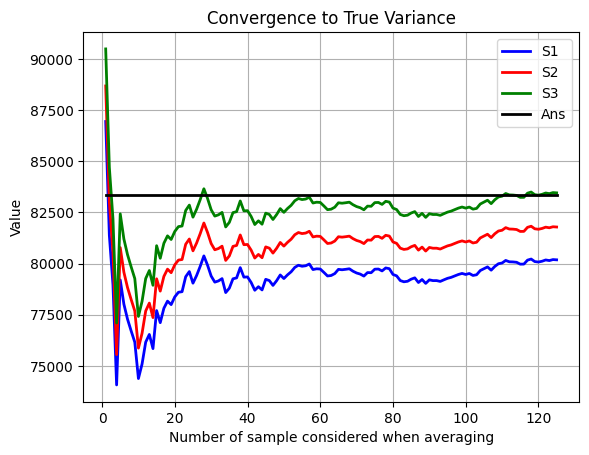

In [14]:
x = np.array([i for i in range(1,n+1)])
y1 = AvgS1
y2 = AvgS2
y3 = AvgS3
y4 = [83333.33332499917]*len(AvgS1)

plt.plot(x, y1, label='S1', color='blue', linestyle='-', linewidth=2)
plt.plot(x, y2, label='S2', color='red', linestyle='-', linewidth=2)
plt.plot(x, y3, label='S3', color='green', linestyle='-', linewidth=2)
plt.plot(x, y4, label='Ans', color='black', linestyle='-', linewidth=2)



plt.xlabel('Number of sample considered when averaging')
plt.ylabel('Value')
plt.title('Convergence to True Variance')

# Add a legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


_+_+_+_+_+_+_+_+_+__+_+_+_+_+_+_+_+_+__+_+_+_+_+_+_+_+_+__END OF QUESTION - 2_+_+_+_+_+_+_+_+_+__+_+_+_+_+_+_+_+_+__+_+_+_+_+_+_+_+_+

Question 4

a) Simulating the die, given a k we can work out the the probabilities as per the given formula and scale this number by 2**k-1 so that we get the number instances of each number in a random array 
Here K = 4, rolls per exp = 4, and number of experiments = 1000

In [15]:
def n_roll_sum(n,insts):
    summ = 0
    for i in range(n):
        summ += insts[random.randint(0,len(insts)-1)]
    return summ

def create_insts(k):
    insts = [1] # exactly one 1 to begin with
    scaler = 2**(k-1)
    for i in range(2,k):
        amt = int(scaler/2**(i-1))
        for j in range(amt):
            insts.append(i)
    insts.append(k)
    return insts

def create_allsums(exp_nums,rolls,insts):
    allsums = []
    for i in range(exp_nums):
        allsums.append(n_roll_sum(rolls,insts))
    return allsums

def bowley(allsums):
    allsums2 = copy.deepcopy(allsums)
    allsums2.sort()
    q1 = (allsums2[249] + allsums2[250])/2
    q2 = (allsums2[499] + allsums2[500])/2
    q3 = (allsums2[749] + allsums2[750])/2
    bowley = ((q1 + q3) - 2*q2 )/ (q3 - q1)
    return bowley


0.21080000000000151
0.3333333333333333


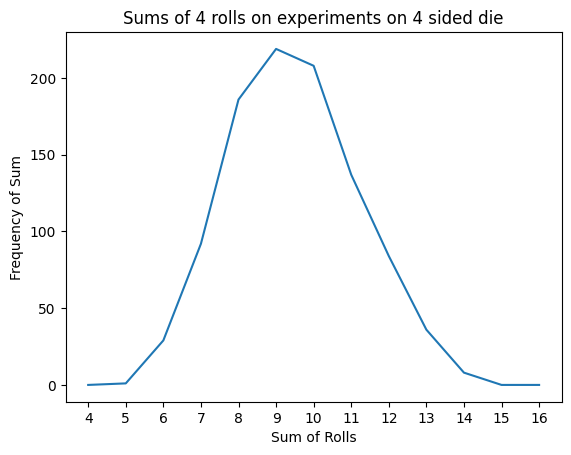

In [66]:
# parameters for the experiment
k = 4 #faces of die
exp_nums = 1000 #number of exps
rolls = 4 #rolls per exp
tsum = 0
for i in range(1000):
    insts = create_insts(k)

    exps = [i+1 for i in range(exp_nums)]
    allsums = create_allsums(exp_nums,rolls,insts)

    tsum += bowley(allsums)
print(tsum/1000)

insts = create_insts(k)

exps = [i+1 for i in range(exp_nums)]
allsums = create_allsums(exp_nums,rolls,insts)

print(bowley(allsums))

y_count = [allsums.count(i) for i in range(rolls,k*rolls+1)]
x_count = [i for i in range(rolls,k*rolls+1)]

plt.plot(x_count,y_count)
plt.xlabel('Sum of Rolls')
plt.xticks(np.arange(rolls, k*rolls+1, 1))
plt.ylabel('Frequency of Sum')
plt.title('Sums of 4 rolls on experiments on 4 sided die')

plt.show()


Here K = 4, rolls per exp = 8, and number of experiments = 1000

-0.02619047619047619
0.3333333333333333


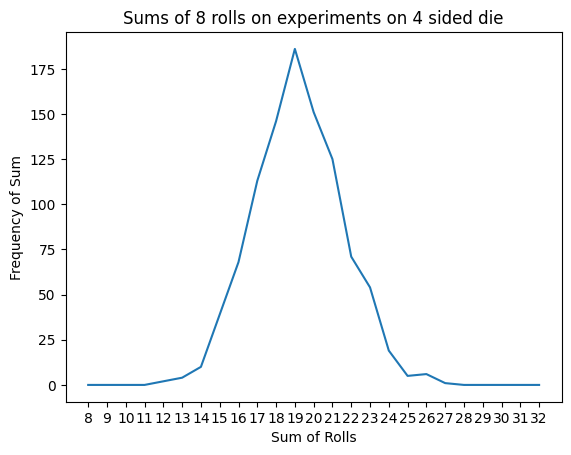

In [63]:
k = 4
exp_nums = 1000
rolls = 8
tsum = 0
for i in range(1000):
    insts = create_insts(k)

    exps = [i+1 for i in range(exp_nums)]
    allsums = create_allsums(exp_nums,rolls,insts)

    tsum += bowley(allsums)
print(tsum/1000)

insts = create_insts(k)

exps = [i+1 for i in range(exp_nums)]
allsums = create_allsums(exp_nums,rolls,insts)

print(bowley(allsums))

y_count = [allsums.count(i) for i in range(rolls,k*rolls+1)]
x_count = [i for i in range(rolls,k*rolls+1)]

plt.plot(x_count,y_count)
plt.xlabel('Sum of Rolls')
plt.xticks(np.arange(rolls, k*rolls+1, 1))
plt.ylabel('Frequency of Sum')
plt.title('Sums of 8 rolls on experiments on 4 sided die')

plt.show()


Here K = 16, rolls per exp = 4, and number of experiments = 1000

0.16288095238095227
0.5


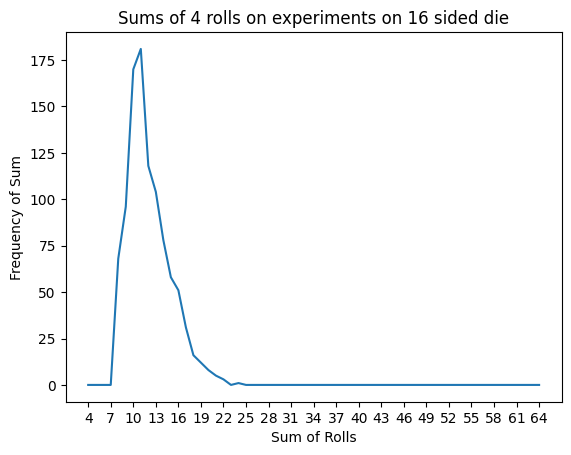

In [71]:
k = 16
exp_nums = 1000
rolls = 4
tsum = 0
for i in range(1000):
    insts = create_insts(k)

    exps = [i+1 for i in range(exp_nums)]
    allsums = create_allsums(exp_nums,rolls,insts)

    tsum += bowley(allsums)
print(tsum/1000)

insts = create_insts(k)

exps = [i+1 for i in range(exp_nums)]
allsums = create_allsums(exp_nums,rolls,insts)

print(bowley(allsums))

y_count = [allsums.count(i) for i in range(rolls,k*rolls+1)]
x_count = [i for i in range(rolls,k*rolls+1)]

plt.plot(x_count,y_count)
plt.xlabel('Sum of Rolls')
plt.xticks(np.arange(rolls, k*rolls+1, 3))
plt.ylabel('Frequency of Sum')
plt.title('Sums of 4 rolls on experiments on 16 sided die')

plt.show()
